Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

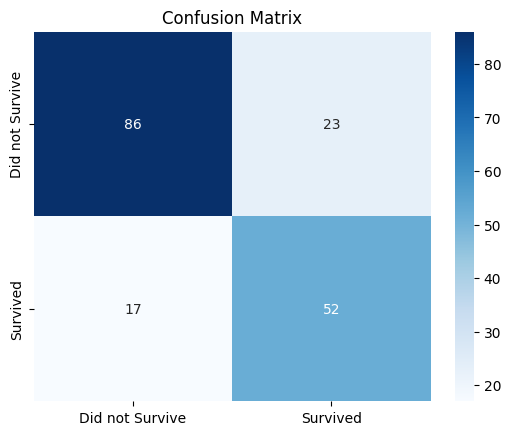


Model Coefficients:
            Coefficient
Sex            2.506943
Embarked_C     0.242755
Embarked_Q     0.141419
Fare          -0.000957
Age           -0.036097
Embarked_S    -0.379906
Pclass        -1.190498

Interpretation of Results:
Sex (being female) has the highest positive coefficient, indicating that women were more likely to survive.
Passengers in higher classes (Pclass 1) had better survival odds, shown by the negative coefficient for Pclass.
Age has a small negative influence, indicating that younger passengers might have had better survival chances.
Fare shows a slight positive correlation, possibly reflecting socio-economic status advantages.

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78   

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace the file path if necessary
df = pd.read_csv("train.csv")  # Ensure the correct path

# Step 2: Initial Data Exploration
print("Dataset preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Step 3: Data Preprocessing
# Handle missing values
# Fill 'Age' with median and drop rows with missing 'Embarked'
df['Age'] = df['Age'].fillna(df['Age'].median())

df.dropna(subset=['Embarked'], inplace=True)

# Convert 'Sex' and 'Embarked' to numeric values
# Sex: Female -> 1, Male -> 0
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
# Embarked: Use one-hot encoding
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop(['Embarked'], axis=1, inplace=True)

# Identify label and features
label = 'Survived'
features = ['Pclass', 'Sex', 'Age', 'Fare'] + list(embarked_dummies.columns)

X = df[features]
y = df[label]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

# Step 7: Interpret the model coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print("\nModel Coefficients:")
print(coefficients)

# Step 8: Discussion
print("\nInterpretation of Results:")
print("Sex (being female) has the highest positive coefficient, indicating that women were more likely to survive.")
print("Passengers in higher classes (Pclass 1) had better survival odds, shown by the negative coefficient for Pclass.")
print("Age has a small negative influence, indicating that younger passengers might have had better survival chances.")
print("Fare shows a slight positive correlation, possibly reflecting socio-economic status advantages.")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nSummary:")
print("The logistic regression model suggests that socio-economic factors, such as passenger class and fare, along with demographic factors like sex and age, significantly influenced survival rates on the Titanic.")
